In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

x_offset=y_offset=50

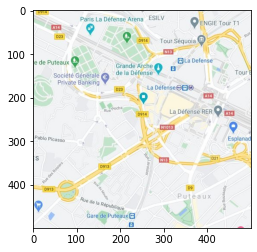

In [2]:
map_image = cv2.cvtColor(cv2.imread('../data/map.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(map_image)

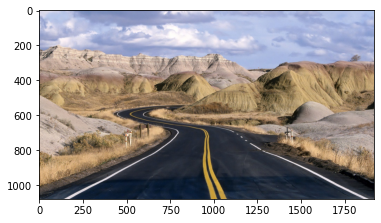

In [3]:
frame = cv2.cvtColor(cv2.imread('../data/input_image_road.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(frame)

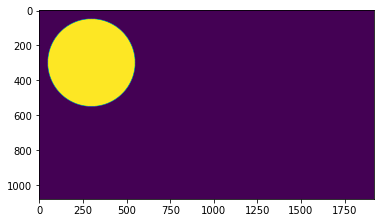

In [6]:
mask = np.zeros(frame.shape[:2], dtype="uint8")
mask_inv = cv2.bitwise_not(mask)

cv2.circle(mask, (int(map_image.shape[0]/2) + y_offset, int(map_image.shape[1]/2) + x_offset),
           int(map_image.shape[0]/2), 255, -1)
plt.imshow(mask)

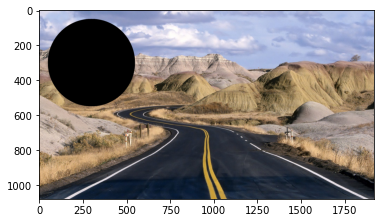

In [8]:
frame_masked = cv2.bitwise_and(frame,frame,mask = mask_inv)
plt.imshow(frame_masked)

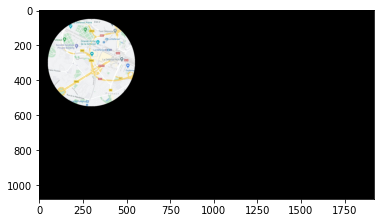

In [9]:
frame[y_offset:y_offset + map_image.shape[0],x_offset:x_offset + map_image.shape[1]] = map_image
map_masked = cv2.bitwise_and(frame,frame,mask = mask)
plt.imshow(map_masked)

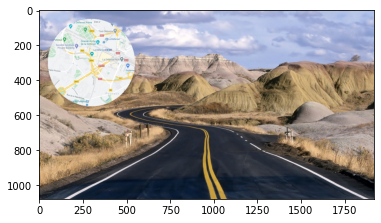

In [10]:
rows,cols,channels = frame.shape
dst = cv2.add(frame_masked,map_masked)
frame[0:rows, 0:cols ] = dst
plt.imshow(dst)